Develop a prediction model to understand how prices of cars vary with their specifications

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# I using Google Colab
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [ ]:
df.isnull().sum().sum()
#see have any null values in the data frame

0

In [ ]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#exploratory  data analysis

EDA_df = df.copy()

In [ ]:
# split the Car name to company name
EDA_df['Company']= EDA_df['CarName'].apply(lambda x: x.split(" ")[0])
EDA_df['Company']= EDA_df['Company'].apply(lambda x: x.lower())

In [ ]:
#list out the company name
EDA_df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# Mis-spell and rename it correctly
EDA_df['Company'].replace({'maxda': 'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'}, inplace=True)

In [ ]:
#checking all name is correct
EDA_df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# removing the car id and car name and change to Company name
 
EDA_df= EDA_df.drop(['car_ID','CarName'], axis=1) 


In [ ]:
EDA_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000,audi
4,2,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.100,188.800,68.900,55.500,2952,ohc,four,141,mpfi,3.780,3.150,9.500,114,5400,23,28,16845.000,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.100,188.800,68.800,55.500,3049,ohc,four,141,mpfi,3.780,3.150,8.700,160,5300,19,25,19045.000,volvo
202,-1,gas,std,four,sedan,rwd,front,109.100,188.800,68.900,55.500,3012,ohcv,six,173,mpfi,3.580,2.870,8.800,134,5500,18,23,21485.000,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.100,188.800,68.900,55.500,3217,ohc,six,145,idi,3.010,3.400,23.000,106,4800,26,27,22470.000,volvo


In [ ]:
numerical= EDA_df.drop(['price'], axis=1).select_dtypes('number').columns

categorical = EDA_df.select_dtypes('object').columns


In [ ]:
categorical


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Company'],
      dtype='object')

In [ ]:
numerical

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [ ]:
EDA_df['price'].describe()

count     205.000
mean    13276.711
std      7988.852
min      5118.000
25%      7788.000
50%     10295.000
75%     16503.000
max     45400.000
Name: price, dtype: float64

In [ ]:
print( f"Skewness: {EDA_df['price'].skew()}")

Skewness: 1.7776781560914454


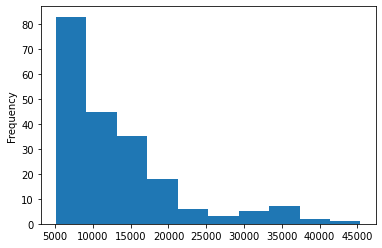

In [ ]:
EDA_df['price'].plot(kind='hist')

In [ ]:
EDA_df[numerical].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751
std,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886
min,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000
25%,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000
50%,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000
75%,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000
max,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000


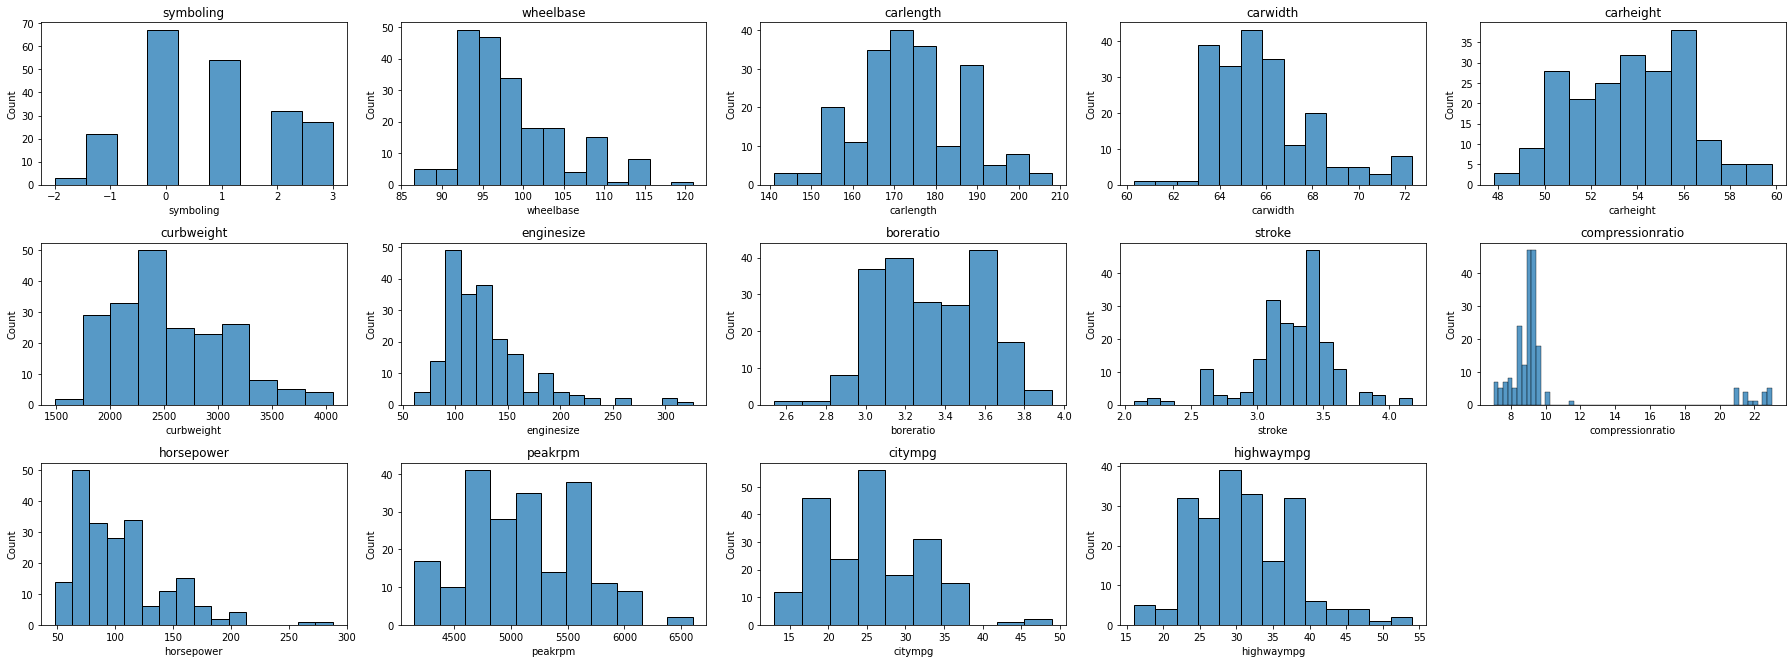

In [ ]:
plt.figure(figsize=(25,15))

for i, column in enumerate(EDA_df[numerical].columns):
    plt.subplot(5,5,i + 1)
    sns.histplot(data=EDA_df[numerical][column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = EDA_df[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio   2.611
enginesize         1.948
horsepower         1.405
wheelbase          1.050
carwidth           0.904
dtype: float64

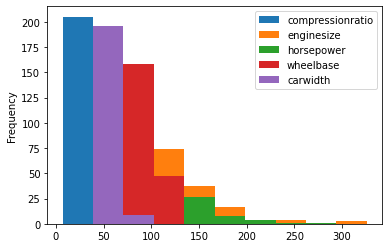

In [ ]:
EDA_df[skew_cols.index].plot(kind='hist');

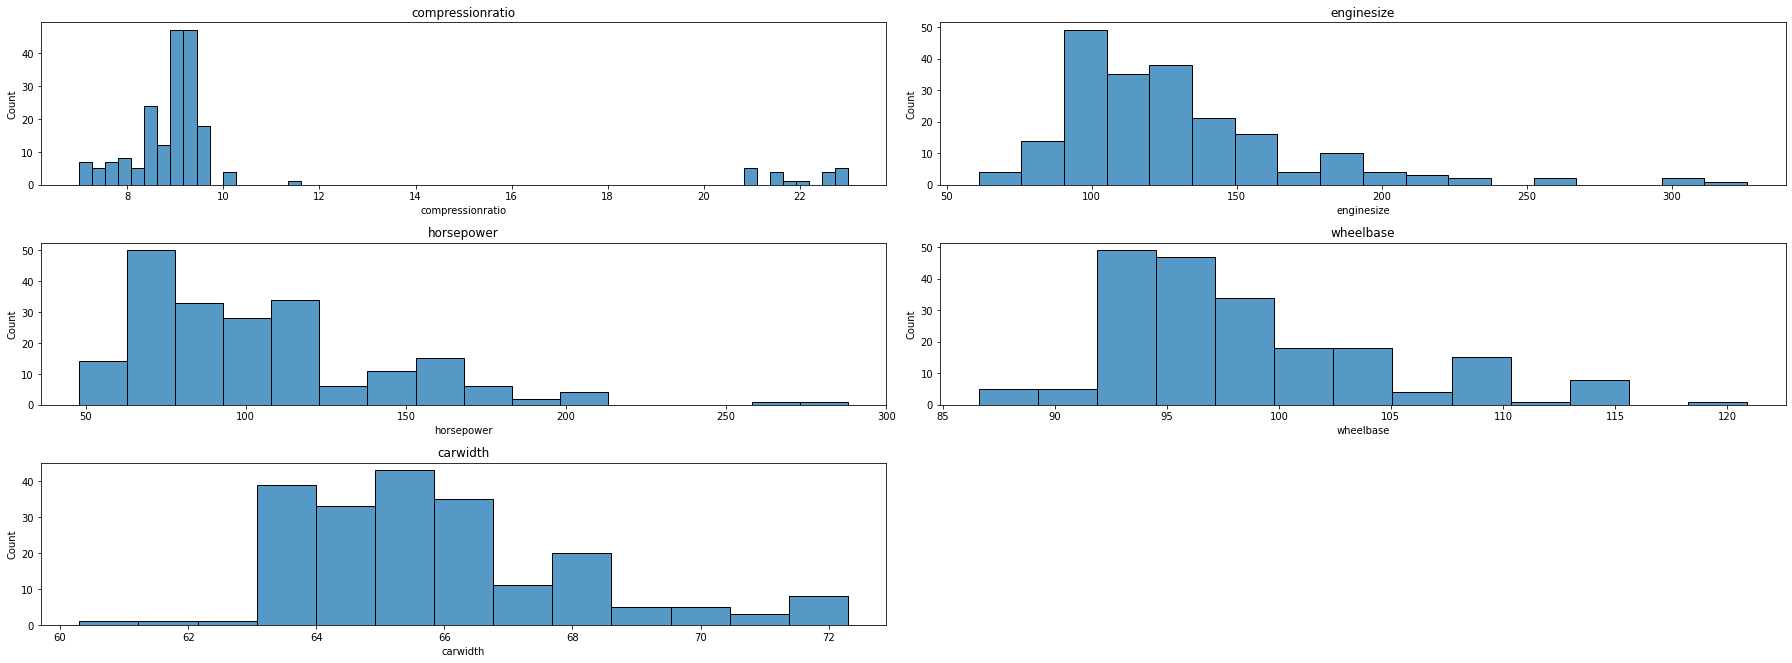

In [ ]:
plt.figure(figsize=(25,15))

for i, column in enumerate(EDA_df[skew_cols.index].columns):
    plt.subplot(5,2,i + 1)
    sns.histplot(data=EDA_df[skew_cols.index][column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

df_trans = EDA_df[skew_cols.index].copy()

trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())

compressionratio    0.034
enginesize         -0.003
horsepower          0.049
wheelbase          -0.003
carwidth            0.108
dtype: float64


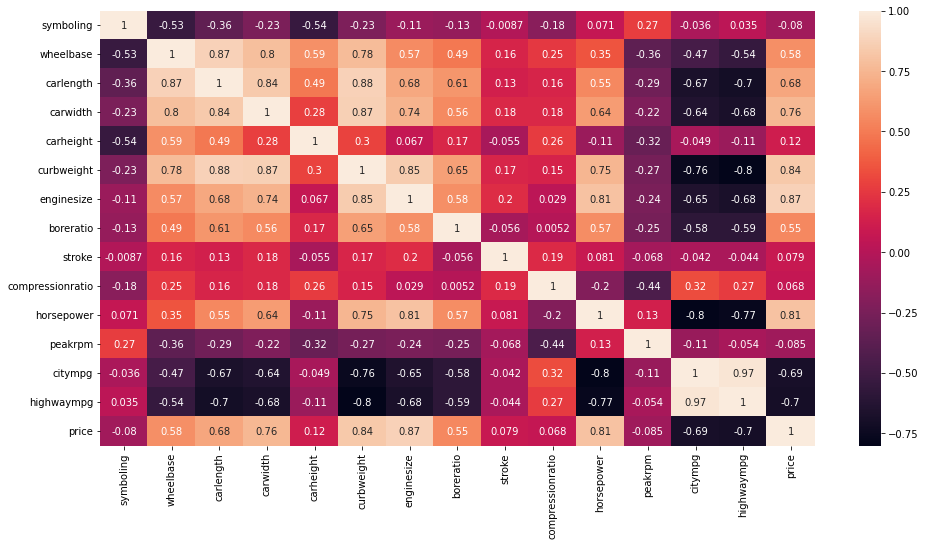

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data=EDA_df.corr(), annot=True);

In [ ]:
# citympg is similar to highwaympg, so we decide to take highwaympg as more people buy car will tends to travel far
EDA_df.drop("citympg", axis=1, inplace=True)


In [ ]:
EDA_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,27,13495.000,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,27,16500.000,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,26,16500.000,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,30,13950.000,audi
4,2,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,22,17450.000,audi


In [ ]:
EDA_df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

fueltype
diesel   15838.150
gas      12999.798
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdb693bb90>],
      dtype=object)

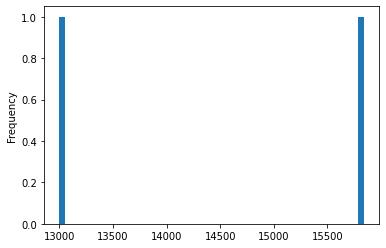

In [ ]:

print(EDA_df.groupby("fueltype").price.mean())
EDA_df.groupby("fueltype").price.mean().plot(kind="hist", subplots=True, bins=50)

Diesel cars are more expensive than cars with gas

aspiration
std     12611.271
turbo   16298.167
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0e87ed0>],
      dtype=object)

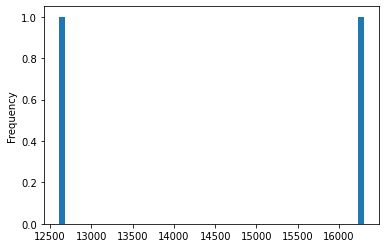

In [ ]:
print(EDA_df.groupby("aspiration").price.mean())
EDA_df.groupby("aspiration").price.mean().plot(kind="hist", subplots=True, bins=50)

Turbo engine is much more expensive than cars with gas

In [ ]:
EDA_df.doornumber.unique()

array(['two', 'four'], dtype=object)

doornumber
four   13501.152
two    12989.924
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0042250>],
      dtype=object)

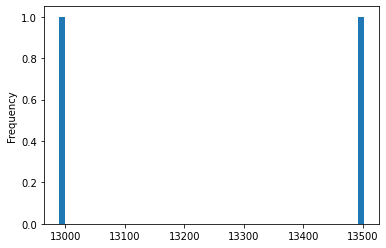

In [ ]:
print(EDA_df.groupby("doornumber").price.mean())
EDA_df.groupby("doornumber").price.mean().plot(kind="hist", subplots=True, bins=50)

Four door slightly expensive than two door

In [ ]:
EDA_df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

carbody
hatchback     10376.652
wagon         12371.960
sedan         14344.271
convertible   21890.500
hardtop       22208.500
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0dbb590>],
      dtype=object)

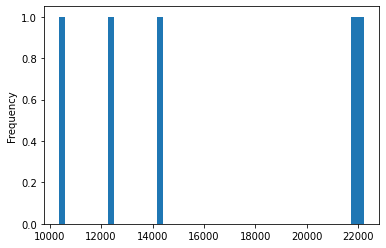

In [ ]:
print(EDA_df.groupby("carbody").price.mean().sort_values())
EDA_df.groupby("carbody").price.mean().plot(kind="hist", subplots=True, bins=50)

Most expensive range are the additional function that allow the car roof to be convertible either hardtop or soft-top. 

In [ ]:
EDA_df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

drivewheel
fwd    9239.308
4wd   11087.463
rwd   19910.809
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc1135e50>],
      dtype=object)

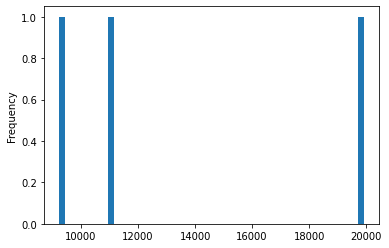

In [ ]:
print(EDA_df.groupby("drivewheel").price.mean().sort_values())
EDA_df.groupby("drivewheel").price.mean().plot(kind="hist", subplots=True, bins=50)

Rear wheel drive car most expensive ones. they are likely most sports cars, sports sedans & muscle cars are rear-wheel drive

In [ ]:
EDA_df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

enginelocation
front   12961.097
rear    34528.000
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0129a50>],
      dtype=object)

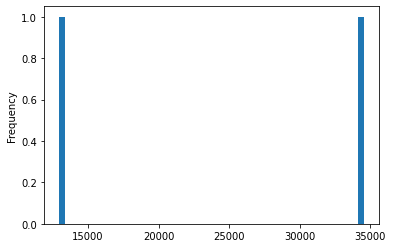

In [ ]:
print(EDA_df.groupby("enginelocation").price.mean())
EDA_df.groupby("enginelocation").price.mean().plot(kind="hist", subplots=True, bins=50)

Rear enginer car most expensive ones. they are likely most sports cars that rear-wheel drive and another reason is to balance the power of the car from spinning.

In [ ]:
EDA_df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

enginetype
ohc     11574.048
rotor   13020.000
ohcf    13738.600
l       14627.583
dohc    18116.417
ohcv    25098.385
dohcv   31400.500
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0ad4c50>],
      dtype=object)

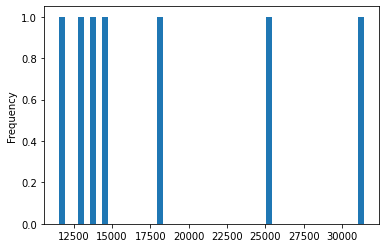

In [ ]:
print(EDA_df.groupby("enginetype").price.mean().sort_values())
EDA_df.groupby("enginetype").price.mean().plot(kind="hist", subplots=True, bins=50)

DOHC engine design is the most fuel-efficient and this may increase the car price

In [ ]:
EDA_df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

cylindernumber
three     5151.000
four     10285.755
two      13020.000
five     21630.470
six      23671.833
twelve   36000.000
eight    37400.100
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0b50310>],
      dtype=object)

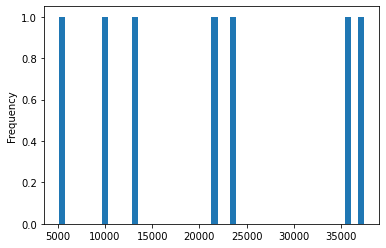

In [ ]:
print(EDA_df.groupby("cylindernumber").price.mean().sort_values())
EDA_df.groupby("cylindernumber").price.mean().plot(kind="hist", subplots=True, bins=50)

the Higher the cylinder number, it show the car are more powerful and will also significant price increases

In [ ]:
EDA_df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

fuelsystem
2bbl    7478.152
1bbl    7555.545
spdi   10990.444
spfi   11048.000
4bbl   12145.000
mfi    12964.000
idi    15838.150
mpfi   17754.603
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0f75450>],
      dtype=object)

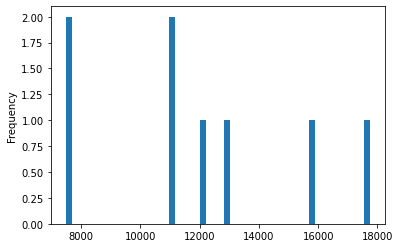

In [ ]:
print(EDA_df.groupby("fuelsystem").price.mean().sort_values())
EDA_df.groupby("fuelsystem").price.mean().plot(kind="hist", subplots=True, bins=50)

High performance car will have better specs and this will affect the price on the car. Common use in the standard car specs are the 2BBL and 1BBL

In [ ]:
EDA_df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Company
chevrolet      6007.000
dodge          7875.444
plymouth       7963.429
honda          8184.692
subaru         8541.250
isuzu          8916.500
mitsubishi     9239.769
renault        9595.000
toyota         9885.812
volkswagen    10077.500
nissan        10415.667
mazda         10652.882
saab          15223.333
peugeot       15489.091
alfa-romero   15498.333
mercury       16503.000
audi          17859.167
volvo         18063.182
bmw           26118.750
porsche       31400.500
buick         33647.000
jaguar        34600.000
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc0b4f7d0>],
      dtype=object)

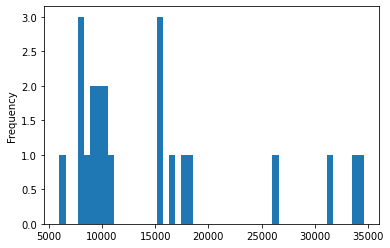

In [ ]:
print(EDA_df.groupby("Company").price.mean().sort_values())
EDA_df.groupby("Company").price.mean().plot(kind="hist", subplots=True, bins=50)

Top 6 expensive brand are mostly europe car maker & only one USA car maker

Data processing

In [ ]:
# Import libraries required
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [ ]:
EDA_df1 = pd.get_dummies(EDA_df, columns=categorical, drop_first=True)
EDA_df1.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Company_audi,Company_bmw,Company_buick,Company_chevrolet,Company_dodge,Company_honda,Company_isuzu,Company_jaguar,Company_mazda,Company_mercury,Company_mitsubishi,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,3,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111,5000,27,13495.000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111,5000,27,16500.000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,94.500,171.200,65.500,52.400,2823,152,2.680,3.470,9.000,154,5000,26,16500.000,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,99.800,176.600,66.200,54.300,2337,109,3.190,3.400,10.000,102,5500,30,13950.000,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,99.400,176.600,66.400,54.300,2824,136,3.190,3.400,8.000,115,5500,22,17450.000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Linear regression model

In [ ]:
X= EDA_df1.drop('price', axis=1)
y= EDA_df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) and  rmse score is : 1868.154474483502, r2 score is 0.924292801437844


Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer

In [ ]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical1= EDA_df1.drop(['price'], axis=1).select_dtypes('number').columns

X= EDA_df1.drop('price', axis=1)
y= EDA_df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) and  rmse score is : 1622.59, r2 score is 0.94
model : Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) and  rmse score is : 2230.8, r2 score is 0.89
model : ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) and  rmse score is : 2329.68, r2 score is 0.88
model : KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') and  rmse score is : 2559.75, r2 score is 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29220858.1320906, tolerance: 1099253.7434955859
  positive)


,RMSE,R2_Test
Ridge,1622.590,0.940
Lasso,2230.800,0.890
ElasticNet,2329.680,0.880
KNeighbors,2559.750,0.860


RFR,GBR,ETR,XGB

In [ ]:
rmse_test =[]
r2_test =[]
model_names =[]



X= EDA_df1.drop('price', axis=1)
y= EDA_df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


rf = RandomForestRegressor(random_state=50)
gb = GradientBoostingRegressor(random_state=50)
et= ExtraTreesRegressor(random_state=50)
xgb = XGBRegressor(random_state=50)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False) and  rmse score is : 1928.47, r2 score is 0.9193
model : GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10

,RMSE,R2_Test
RandomForest,1928.470,0.920
GradientBoost,1797.760,0.930
ExtraTree,1826.600,0.930
XGB,1636.690,0.940
